In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [10]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [11]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set

## Initialize Configs

In [15]:
EXPERIMENT_NAME = 'one_repair_lvl_many_models_income_GA'
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
DATASET_NAME = 'Folktables_GA_2018_Income'
EXPERIMENT_SESSION_UUID = '78049b4f-0ef4-41d7-b3c5-9c3ab8a019f8'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
# MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']
MODEL_NAMES = ['LogisticRegression', 'RandomForestClassifier']

In [16]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [17]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [18]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(288, 35)

In [19]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_GA_2018_Income,20,0,OK,2023-07-26 21:40:06.899,...,0.824477,1.000000,0.000000,0.841667,1.000000,0.000000,0.820513,1.000000,0.000000,0.830667
1,Accuracy,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_GA_2018_Income,20,0,OK,2023-07-26 21:44:12.962,...,0.807568,1.000000,0.000000,0.833333,1.000000,0.000000,0.805128,1.000000,0.000000,0.818667
2,Accuracy,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_GA_2018_Income,20,1,OK,2023-07-26 21:40:06.926,...,0.812399,1.000000,0.000000,0.812500,1.000000,0.000000,0.810256,1.000000,0.000000,0.811333
3,Accuracy,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_GA_2018_Income,20,1,OK,2023-07-26 21:44:12.975,...,0.801932,1.000000,0.000000,0.797222,1.000000,0.000000,0.806410,1.000000,0.000000,0.802000
4,Accuracy,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_GA_2018_Income,20,2,OK,2023-07-26 21:40:06.939,...,0.747987,1.000000,0.000000,0.744444,1.000000,0.000000,0.750000,1.000000,0.000000,0.747333
5,Accuracy,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_GA_2018_Income,20,2,OK,2023-07-26 21:44:12.987,...,0.744767,1.000000,0.000000,0.734722,1.000000,0.000000,0.756410,1.000000,0.000000,0.746000
6,Accuracy,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_GA_2018_Income,20,3,OK,2023-07-26 21:40:06.950,...,0.760064,1.000000,0.000000,0.745833,1.000000,0.000000,0.758974,1.000000,0.000000,0.752667
7,Accuracy,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_GA_2018_Income,20,3,OK,2023-07-26 21:44:12.999,...,0.756844,1.000000,0.000000,0.747222,1.000000,0.000000,0.752564,1.000000,0.000000,0.750000
32,Aleatoric_Uncertainty,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_GA_2018_Income,20,0,OK,2023-07-26 21:40:06.899,...,0.579009,0.526778,0.824354,0.555107,0.508388,0.803455,0.582025,0.529240,0.823330,0.569104
33,Aleatoric_Uncertainty,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_GA_2018_Income,20,0,OK,2023-07-26 21:44:12.962,...,0.590683,0.533033,0.832622,0.568475,0.517490,0.823398,0.596329,0.540743,0.825989,0.582959


In [20]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [24]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.0][3].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
14,Accuracy,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,20,3,OK,2023-07-26 21:40:06.991,...,0.760870,1.000000,0.000000,0.762500,1.000000,0.000000,0.755128,1.000000,0.000000,0.758667
46,Aleatoric_Uncertainty,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,20,3,OK,2023-07-26 21:40:06.991,...,0.659608,0.607290,0.826077,0.669041,0.618768,0.830443,0.656037,0.598623,0.833086,0.662279
78,F1,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,20,3,OK,2023-07-26 21:40:06.991,...,0.636475,1.000000,0.000000,0.645963,1.000000,0.000000,0.627680,1.000000,0.000000,0.636546
110,FNR,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,20,3,OK,2023-07-26 21:40:06.991,...,0.456067,0.000000,1.000000,0.440860,0.000000,1.000000,0.465116,0.000000,1.000000,0.453448
142,FPR,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,20,3,OK,2023-07-26 21:40:06.991,...,0.103403,0.000000,1.000000,0.108844,0.000000,1.000000,0.106472,0.000000,1.000000,0.107609
174,IQR,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,20,3,OK,2023-07-26 21:40:06.991,...,0.083650,0.076847,0.105298,0.086076,0.079013,0.108752,0.083165,0.075731,0.106091,0.084562
206,Jitter,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,20,3,OK,2023-07-26 21:40:06.991,...,0.085083,0.059727,0.165763,0.089942,0.063915,0.173500,0.089899,0.060575,0.180325,0.089919
238,Label_Stability,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,20,3,OK,2023-07-26 21:40:06.991,...,0.883575,0.919577,0.769024,0.876667,0.913479,0.758480,0.876282,0.917997,0.747644,0.876467
270,Mean,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,20,3,OK,2023-07-26 21:40:06.991,...,0.656355,0.675131,0.596611,0.648478,0.667484,0.587459,0.656233,0.677576,0.590416,0.652511
302,Overall_Uncertainty,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,20,3,OK,2023-07-26 21:40:06.991,...,0.679333,0.625820,0.849600,0.689456,0.637864,0.855090,0.675613,0.616790,0.857010,0.682257


In [22]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [23]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.0][3].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,0.024256,-0.013493,0.014890,RandomForestClassifier,Exp_iter_1,0.0,3
1,Equalized_Odds_FPR,0.002372,0.004546,0.024802,RandomForestClassifier,Exp_iter_1,0.0,3
2,Equalized_Odds_FNR,-0.024256,0.013493,-0.014890,RandomForestClassifier,Exp_iter_1,0.0,3
3,Disparate_Impact,1.038142,0.960742,1.064434,RandomForestClassifier,Exp_iter_1,0.0,3
4,Statistical_Parity_Difference,0.026864,-0.028542,0.045697,RandomForestClassifier,Exp_iter_1,0.0,3
5,Accuracy_Parity,0.007372,-0.018920,-0.012808,RandomForestClassifier,Exp_iter_1,0.0,3
6,Label_Stability_Ratio,1.000439,0.959929,0.953228,RandomForestClassifier,Exp_iter_1,0.0,3
7,IQR_Parity,0.002911,0.004459,0.005302,RandomForestClassifier,Exp_iter_1,0.0,3
8,Std_Parity,0.001964,0.002247,0.003203,RandomForestClassifier,Exp_iter_1,0.0,3
9,Std_Ratio,1.031015,1.035363,1.050257,RandomForestClassifier,Exp_iter_1,0.0,3


In [ ]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.5][0].head()

## Figure 1. Subgroup boxplots.

In [25]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [26]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

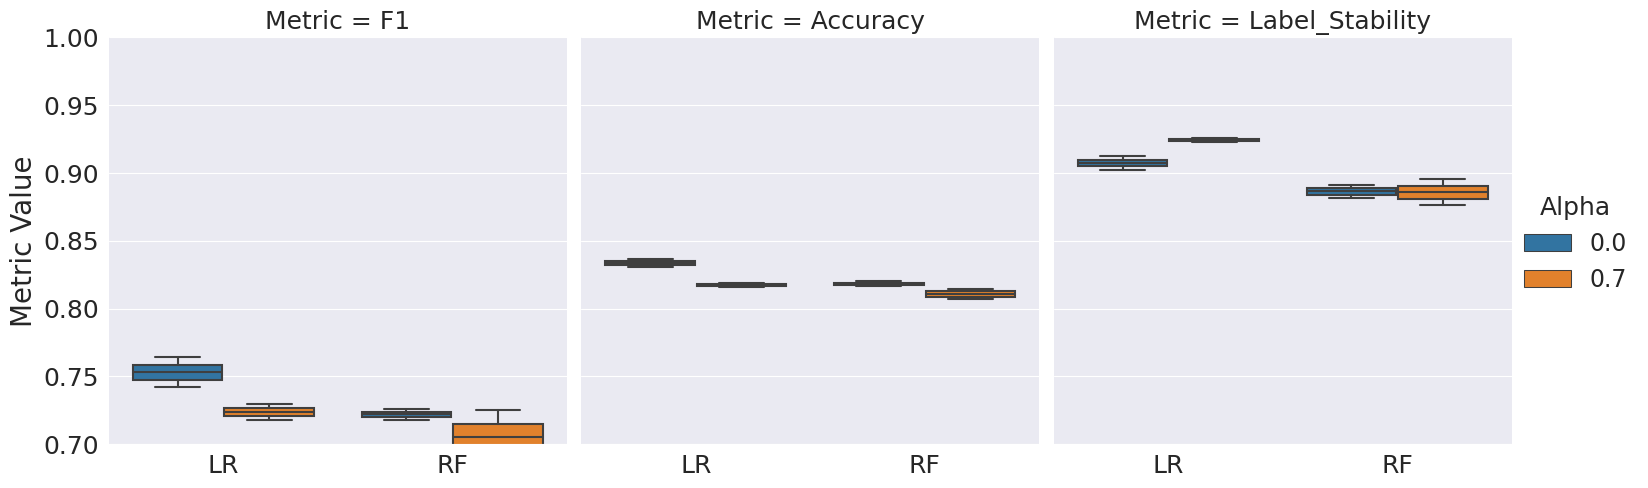

In [27]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.7, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

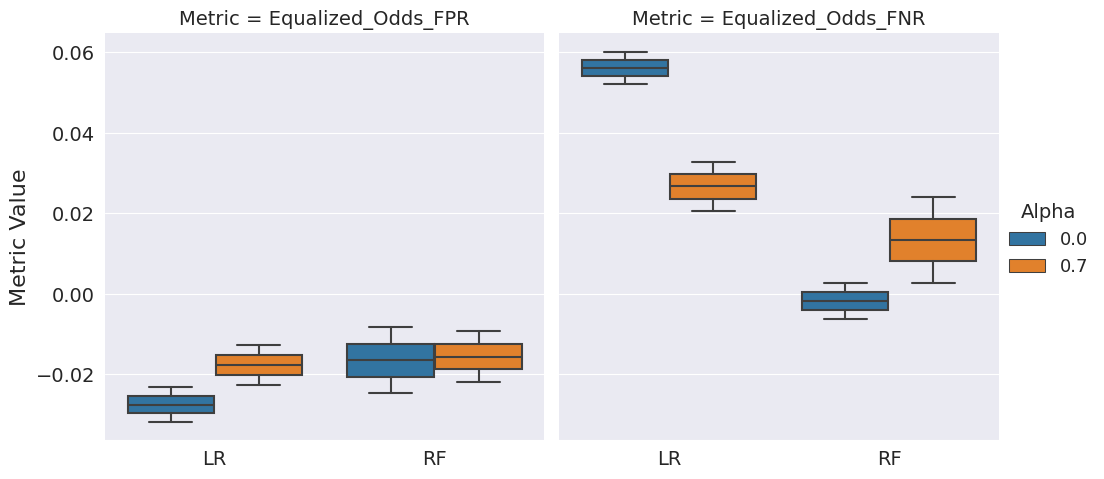

In [28]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [30]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'GA 2018',
    1: 'GA 2017',
    2: 'NY 2018',
    3: 'NY 2017',
}

<Figure size 1200x600 with 0 Axes>

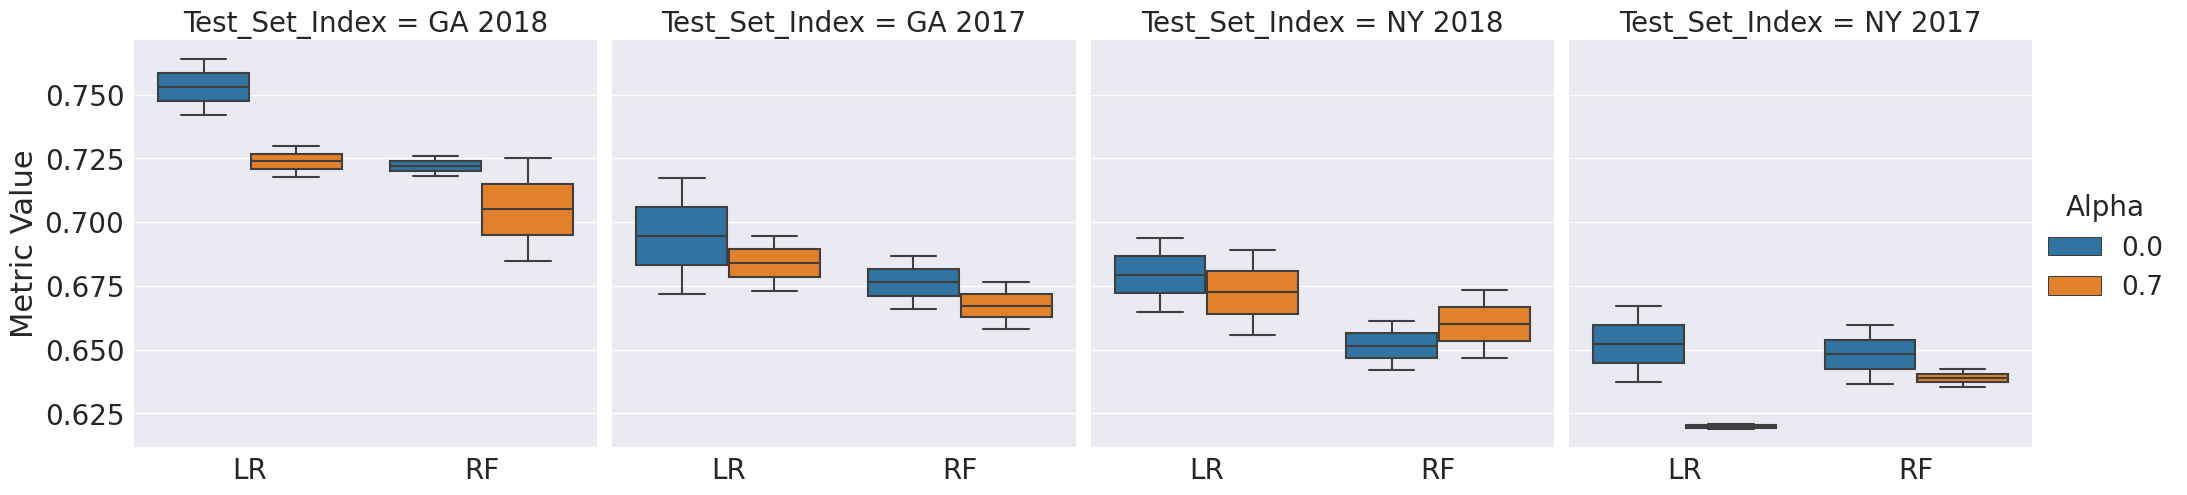

In [31]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

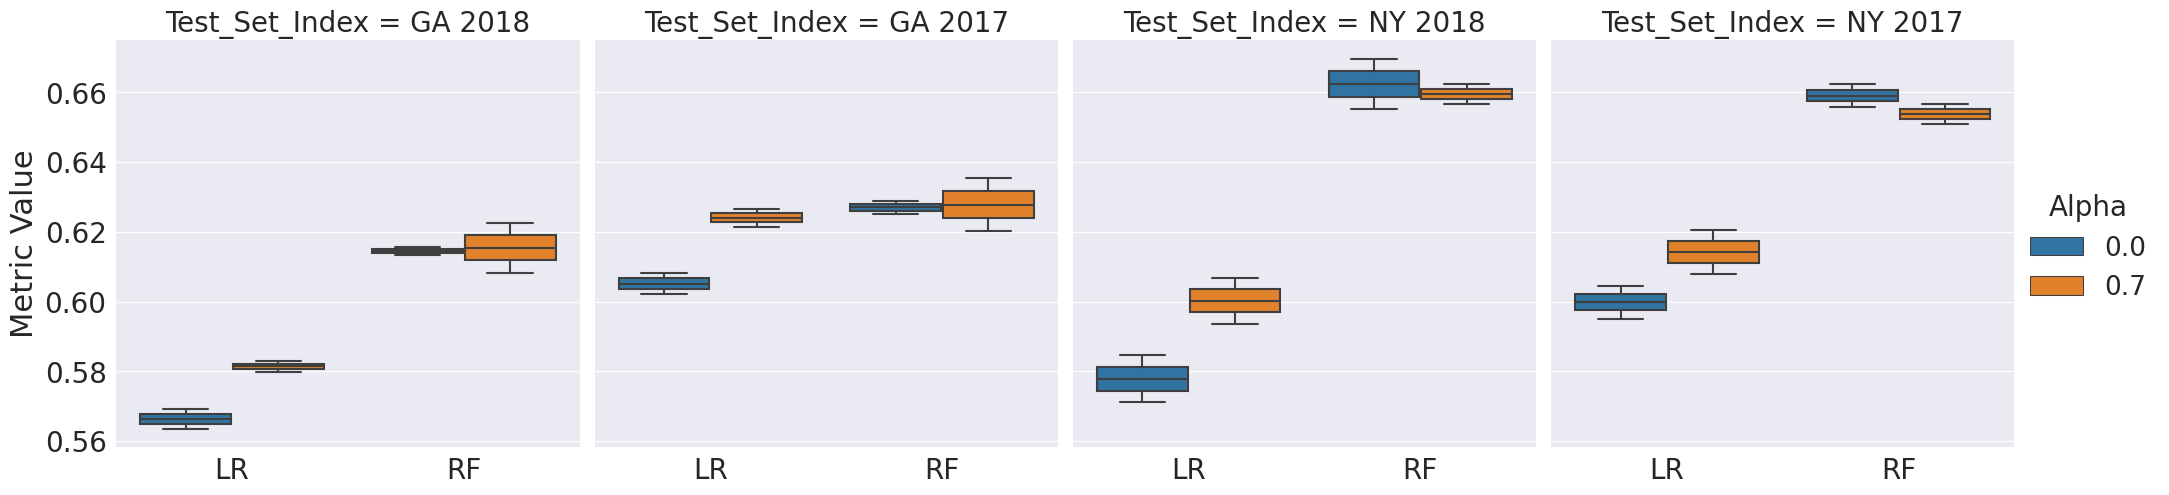

In [32]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

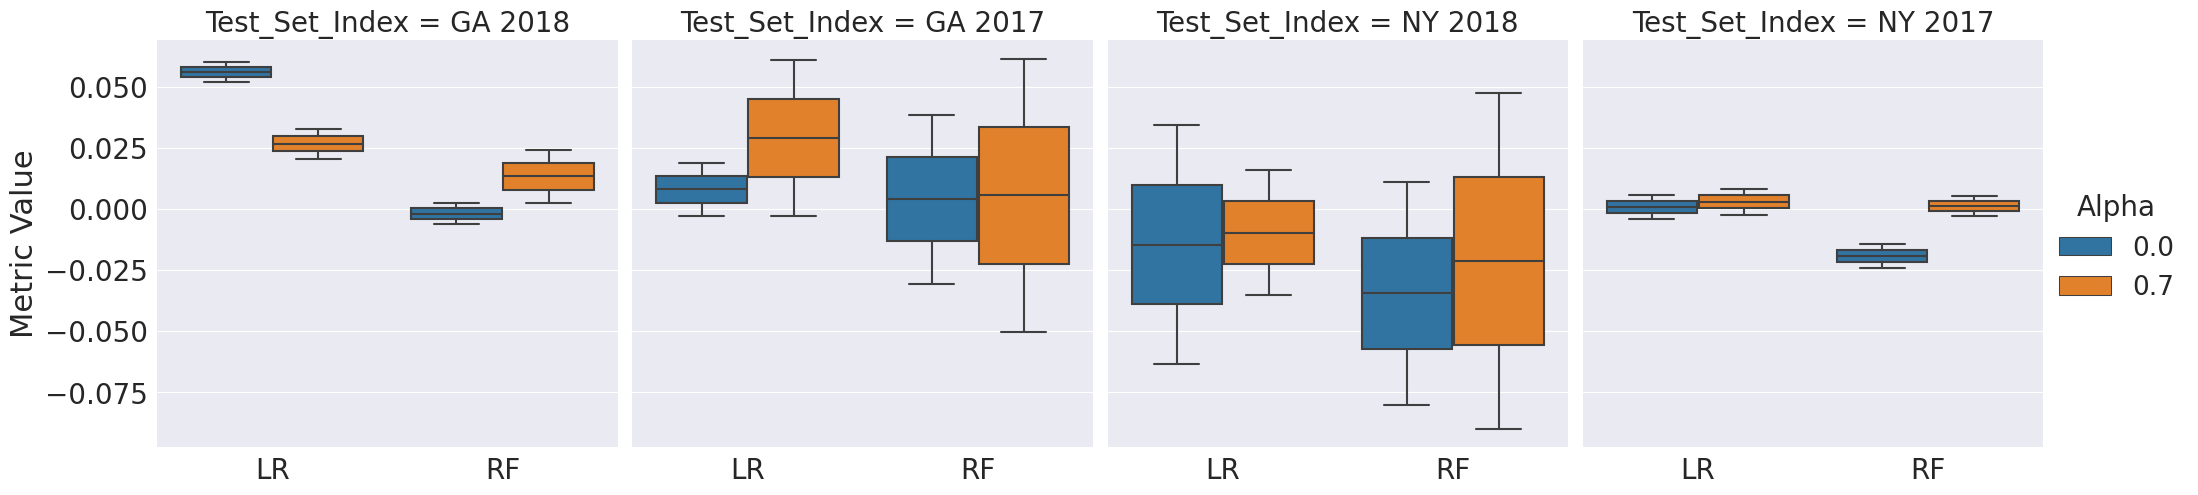

In [33]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

## Figure 3. Scatter plots.

In [34]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='SEX',
                    fairness_metric_name='Equalized_Odds_FPR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)

In [35]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='SEX&RAC1P',
                    fairness_metric_name='Equalized_Odds_FPR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)

In [36]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='RAC1P',
                    fairness_metric_name='Equalized_Odds_FNR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)